In [2]:
import fipy
from fipy import *
from ConvectionDiffusionFVSolver import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


######################################################################
# Plot configurations
# mpl.style.use('classic')
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['lines.dashed_pattern'] = [6, 6]
mpl.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
mpl.rcParams['lines.dotted_pattern'] = [1, 3]
mpl.rcParams['lines.scale_dashes'] = False

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0
######################################################################
%matplotlib inline

In [3]:
pv_exp=[0.06, 0.24, 0.47, 0.59, 0.71, 0.94, 1.00, 1.06, 1.12, 1.18, 1.29, 1.41, 
      1.53, 1.82, 2.24, 2.71, 2.94, 3.18];
c_exp=[0, 0, 0, 0, 0.043839945, 0.23571823, 0.393948895, 0.579304041,
       0.682607092, 0.789883458, 0.920350084, 0.955819637, 0.983220378, 1.001877569, 0.997183646, 
       0.997183646, 1.001877569, 1.001877569];

In [4]:
L = 1.
nx = 1000
dx = L / nx
bcL = 1.
bcR = 0.

peclet = 10.
u  = 1.

alfa1   = 10
dt      = alfa1*dx

tend = 3.5
steps = int(tend/dt)
pv_mod = np.arange(0,tend+dt,dt)

<function matplotlib.pyplot.tight_layout>

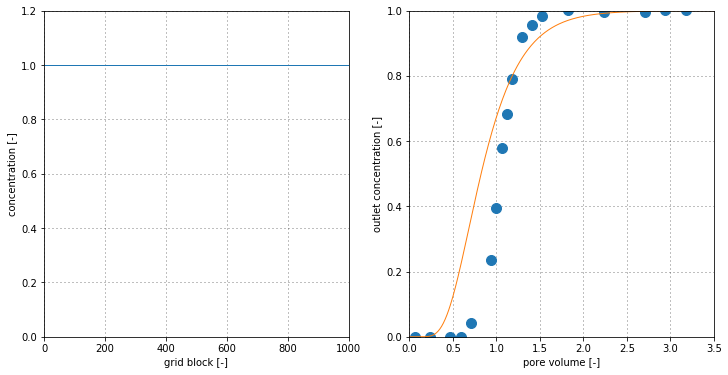

In [5]:
c_mod, cout_mod = ConvDiffFV(peclet,u,bcR,bcL,nx,dx,dt,steps)

plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.plot(np.linspace(0,nx,nx),c_mod)
plt.xlabel('grid block [-]')
plt.ylabel('concentration [-]')
plt.grid() 
plt.tight_layout
plt.ylim([0,1.2])

plt.subplot(1,2,2)
plt.plot(pv_exp,c_exp,'o',markersize=10,label='experimental data')
plt.plot(pv_mod,cout_mod,label='finite volumet solution')
plt.xlabel('pore volume [-]')
plt.ylabel('outlet concentration [-]')
plt.ylim([0,1])
plt.grid() 
plt.tight_layout

In [6]:
def misfit(x):
    c_mod, cout_mod = ConvDiffFV(x,u,bcR,bcL,nx,dx,dt,steps)
    c_est =  0 * np.ndarray(len(pv_exp))
    r    = 0
    for pv in pv_exp:
        dif = abs(pv_mod-pv)
        a= float(cout_mod[np.where(dif == dif.min())])
        c_est[r] = a
        r = r + 1
    s = sum((c_exp-c_est)**2)
    return s

In [7]:
from scipy import stats, optimize
es = optimize.least_squares(misfit, [10.])
es

 active_mask: array([ 0.])
        cost: 0.0031645979206763809
         fun: array([ 0.07955624])
        grad: array([ -4.21431858e-08])
         jac: array([[ -5.29728203e-07]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 23
        njev: 11
  optimality: 4.2143185813309374e-08
      status: 3
     success: True
           x: array([ 125.16365241])

<function matplotlib.pyplot.tight_layout>

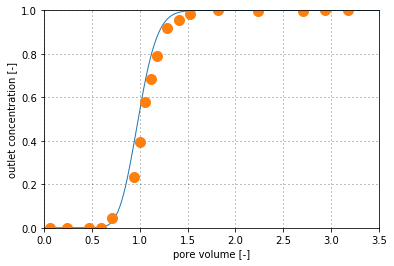

In [8]:
es.x
c_mod, cout_mod = ConvDiffFV(es.x[0],u,bcR,bcL,nx,dx,dt,steps)
plt.plot(pv_mod,cout_mod)
plt.plot(pv_exp,c_exp,'o',markersize=10)

plt.xlabel('pore volume [-]')
plt.ylabel('outlet concentration [-]')
plt.ylim([0,1])
plt.grid() 
plt.tight_layout

In [10]:
print es.x[0]

125.163652407
